In [1]:
from ctypes import windll#only needed on windows to account for DPI Scaling 
user32 = windll.user32
user32.SetProcessDPIAware()
import os
import time
from PIL import Image
import io
from selenium import webdriver
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
chrome_options = webdriver.ChromeOptions()
#chrome_options.add_argument("--headless")  
prefs = {"download.default_directory" : os.getcwd()+"/data"}
chrome_options.add_experimental_option("prefs",prefs)
driver = webdriver.Chrome(chrome_options=chrome_options)

In [2]:
#We're going to show how to do everything with youtube
driver.get('http://www.youtube.com/')

In [3]:
def show_image(image):
    #this downsamples the image but shows it easily in our notebook
    w = 16
    h = 9
    fig = plt.figure(frameon=False)
    fig.set_size_inches(w,h)
    #plt.imshow()#, aspect='auto',figsize = (10,10))
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(image, aspect='auto')

def get_screenshot(driver):
    img=driver.get_screenshot_as_png()
    image = Image.open(io.BytesIO(img)).convert("RGB")#PIL opens images as a RGBA (alpha channel for transparency)
    return np.asarray(image).astype(np.uint8)
def show_screen(driver):
    image=get_screenshot(driver)
    show_image(image)

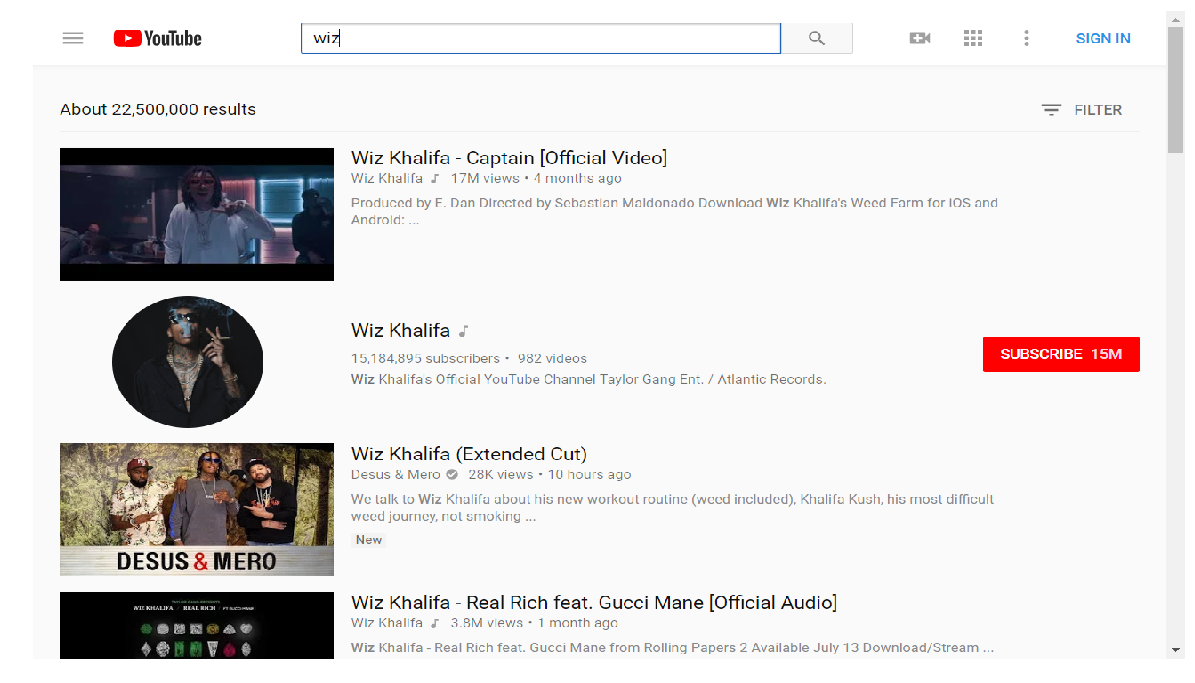

In [4]:
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
actions = ActionChains(driver)
actions.send_keys('wiz')
actions.send_keys(Keys.RETURN)
actions.perform()
show_screen(driver)

In [5]:
import cv2

In [6]:
driver.get_window_size()

{'height': 806, 'width': 1051}

In [7]:
element=driver.find_elements_by_xpath("//*[contains(text(), 'Wiz Khalifa')]")[0]
element.location

{'x': 286, 'y': 141}

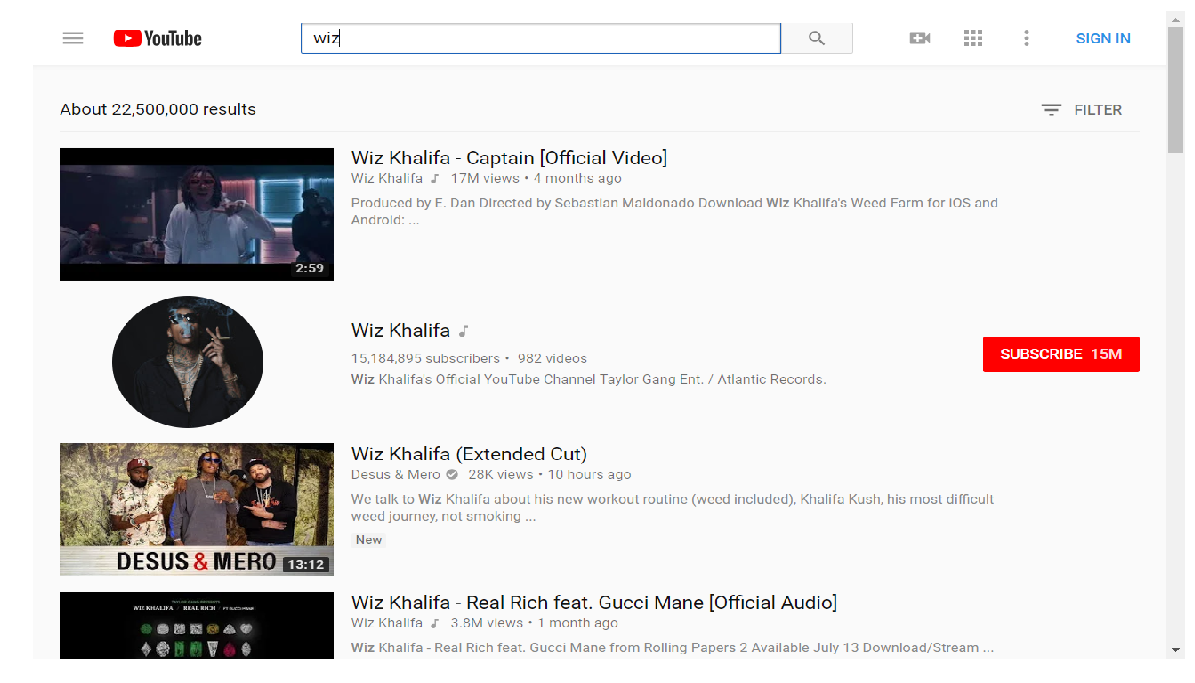

In [8]:
img=get_screenshot(driver)
show_image(img)

In [9]:
#driver.set_window_size(844,800)

def get_bbox_element(web_element):
    window_size=driver.get_window_size()
    pt_1=(web_element.location['x'], web_element.location['y'])
    pt_2=(pt_1[0]+web_element.size['width'], pt_1[1]+web_element.size['height'])
    x_scaling=1.25#my DPI scaling on windows for my PC
    y_offset=0
    mapped_points=(int(pt_1[0]*x_scaling), int(pt_1[1]*x_scaling)),\
    (int(pt_2[0]*x_scaling), int(pt_2[1]*x_scaling)),

                  
    return mapped_points
img=get_screenshot(driver)
for element in driver.find_elements_by_xpath("//*[contains(text(), 'Wiz')]"):
    bbox=get_bbox_element(element)
    cv2.rectangle(img, bbox[0],bbox[1], (127,127,0),3)

True

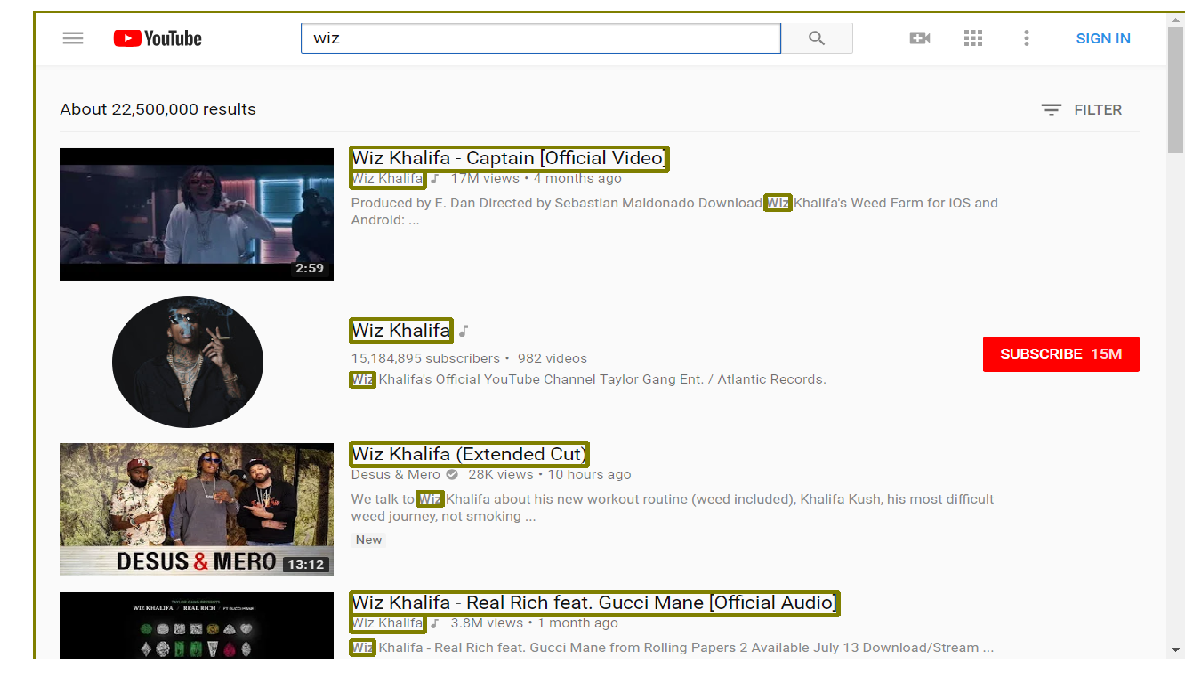

In [11]:
show_image(img)
cv2.imwrite("bounding_boxes.png", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

With this you'll have everything you need to begin scraping using imges. Or train neural nets using images generated by html. You can also generate video using the ffmpeg library (see the other notebook).
